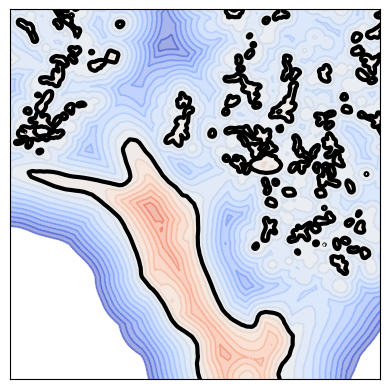

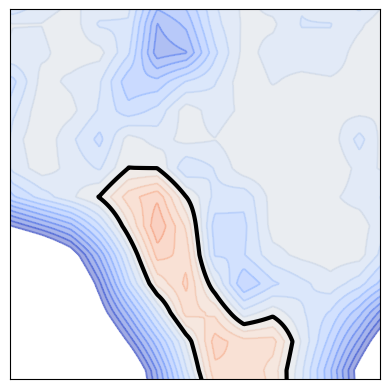

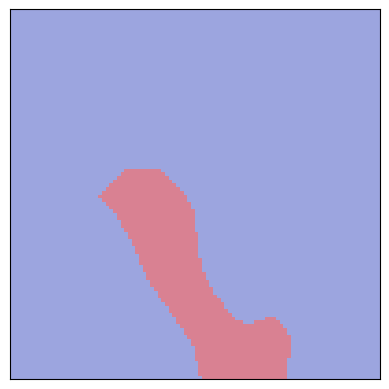

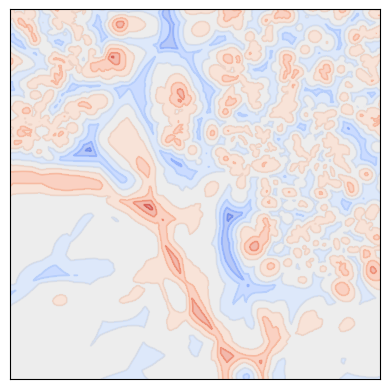

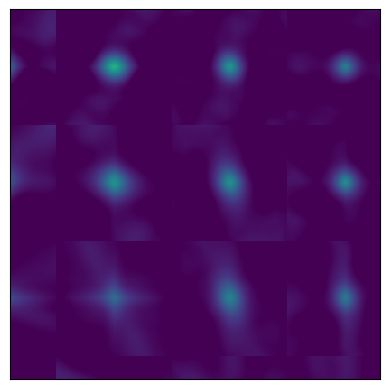

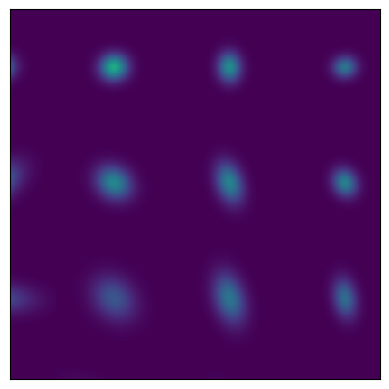

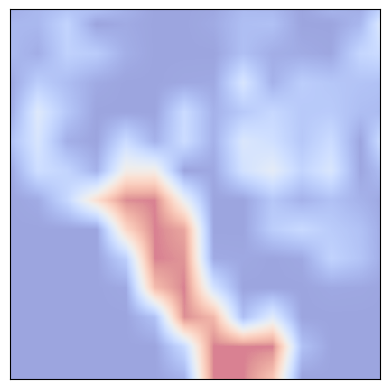

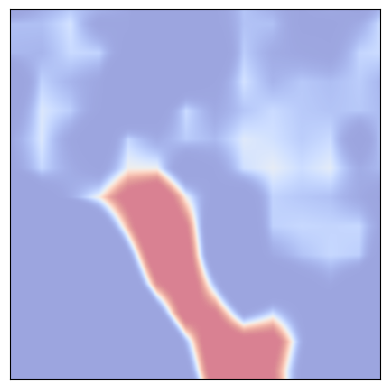

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interp

import utils
pref = "testing/est-acf/mesh/tree_01/"

dim = 2048

cutout_range = [
    (-0.4, 0.0),
    (-0.3, 0.1)
]

# cutout_range = [
#     (-1, 1),
#     (-1, 1)
# ]


max_range = 0.2
levels = 21


utils.plot_prior(pref + f"sdf-{dim}-values.bin", plt.gca(), levels=levels, max_range=max_range)
plt.ylim(*cutout_range[0])
plt.xlim(*cutout_range[1])
plt.show()

utils.plot_prior(pref + "downsampled-mean.bin", plt.gca(), levels=levels, max_range=max_range)
plt.ylim(*cutout_range[0])
plt.xlim(*cutout_range[1])
plt.show()

utils.plot_posterior(pref + "downsampled-mean.bin", plt.gca(), None, 1, "downsampled-mean", None)
plt.ylim(*cutout_range[0])
plt.xlim(*cutout_range[1])
plt.show()

utils.plot_prior(pref + "residual.bin", plt.gca(), level_set=False)
plt.ylim(*cutout_range[0])
plt.xlim(*cutout_range[1])
plt.show()

xs = np.linspace(-1,1,dim)
xx, yy = np.meshgrid(xs,xs)

middle_idx = len(xs) // 2

def plot_cov(file, ax, do_shift=False):
    realizations = np.fromfile(file, dtype=np.float64)
    res = int(np.sqrt(realizations.shape[0]))
    realizations = np.reshape(realizations, (res, res))
    realizations = realizations.transpose(1, 0)
    xs = np.linspace(-1,1,res)
    xx, yy = np.meshgrid(xs,xs)
    ax.pcolormesh(xx,yy, realizations, vmin=0, vmax=0.0005)
    #ax.set_xlim(-10,10)
    #ax.set_ylim(-10,10)
    ax.set_aspect("equal")
    ax.set_xticks([])
    ax.set_yticks([])
    return realizations

def plot_occupancy(file, ax,):
    realizations = np.fromfile(file, dtype=np.float64)
    res = int(np.sqrt(realizations.shape[0]))
    realizations = np.reshape(realizations, (res, res))
    realizations = realizations.transpose(1, 0)
    #ax.pcolormesh(xx,yy, np.log(np.maximum(realizations, 0.00000001)), cmap="coolwarm", alpha=0.5)

    xs = np.linspace(-1,1,res)

    grid_interp = interp.RegularGridInterpolator((xs, xs), realizations.transpose())
    hd_xs = np.linspace(-1, 1, dim)
    hd_ys = np.linspace(-1, 1, dim)
    hd_xx, hd_yy = np.meshgrid(hd_xs,hd_ys)

    interp_reals = np.atleast_2d(grid_interp((hd_xx, hd_yy)))

    ax.pcolormesh(hd_xx,hd_yy, interp_reals, cmap="coolwarm", alpha=0.5)
    ax.set_aspect("equal")
    ax.set_xticks([])
    ax.set_yticks([])
    return realizations

acf_fftw = plot_cov(pref + "acf-fftw.bin", plt.gca())
plt.ylim(*cutout_range[0])
plt.xlim(*cutout_range[1])
plt.show()

acf_fit = plot_cov(pref + "acf-fit.bin", plt.gca())
plt.ylim(*cutout_range[0])
plt.xlim(*cutout_range[1])
plt.show()

plot_occupancy(pref + "occupancy-avg-values.bin", plt.gca())
plt.ylim(*cutout_range[0])
plt.xlim(*cutout_range[1])
plt.show()

plot_occupancy(pref + "occupancy-high-values.bin", plt.gca())
plt.ylim(*cutout_range[0])
plt.xlim(*cutout_range[1])
plt.show()


plot_occupancy(pref + "occupancy-values.bin", plt.gca())
plt.ylim(*cutout_range[0])
plt.xlim(*cutout_range[1])
plt.show()


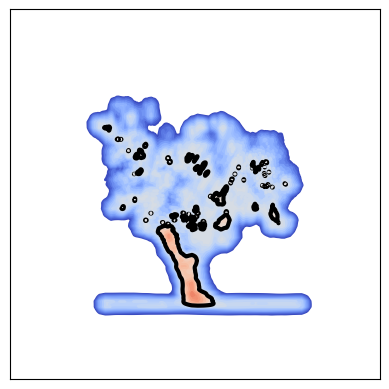

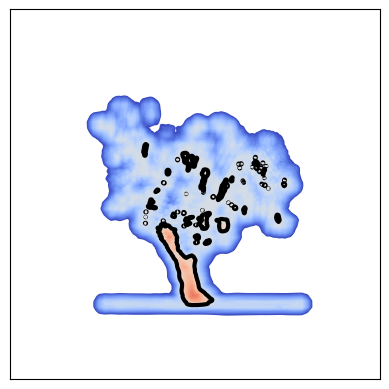

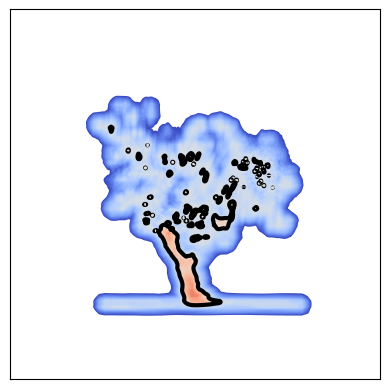

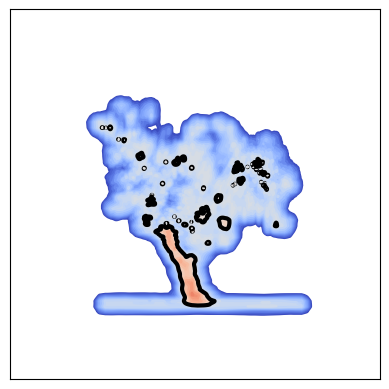

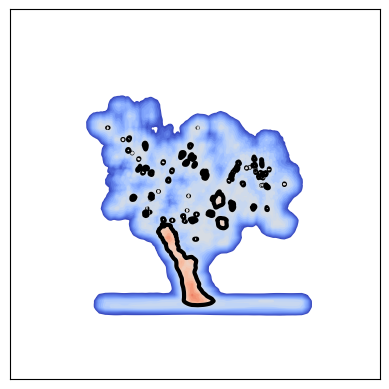

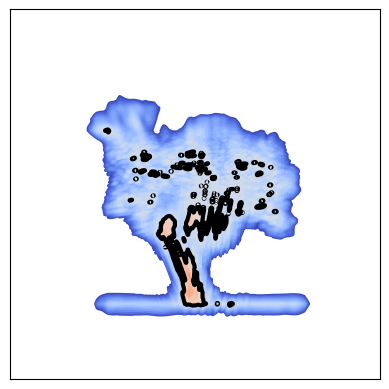

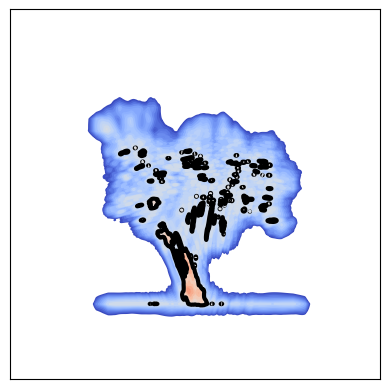

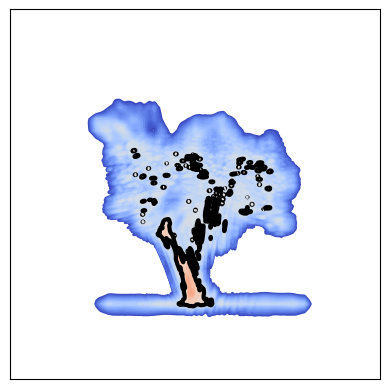

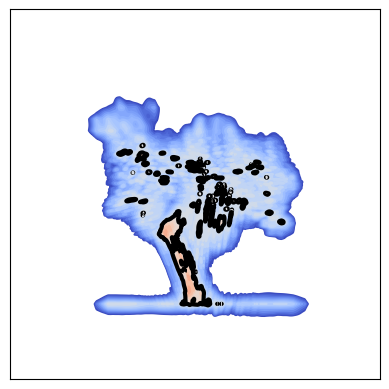

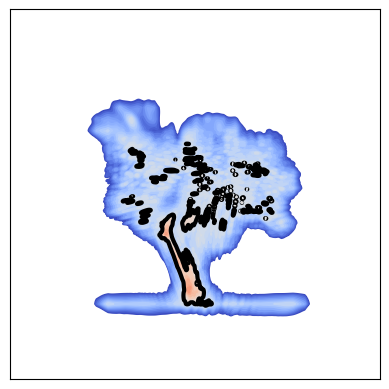

In [20]:
import glob

def plot_manual(file, ax, alpha, levels):
    realization = np.fromfile(file, dtype=np.float64)
    res = int(np.sqrt(realization.shape[0]))
    realization = np.reshape(realization, (res, res))
    realization = realization.transpose(1, 0)

    realization[np.isnan(realization)] = 10

    realization = -realization
    max_v = np.max(realization)
    min_v = np.min(realization)

    abs_range = max_range

    level_values = np.linspace(-abs_range, abs_range, levels)
    cs = ax.contour(xx, yy, realization, alpha=alpha, levels = level_values, cmap="coolwarm")
    if(len(cs.collections) > 5):
        ax.contourf(xx, yy, realization, alpha=alpha,  levels = level_values, cmap="coolwarm")

    ax.contour(xx, yy, realization, alpha=alpha, levels = [0], linewidths=3, colors="black")

    ax.set_aspect("equal")
    ax.set_xticks([])
    ax.set_yticks([])
    return realization


for file in glob.glob(pref + "sample-*-values.bin"):
    plot_manual(file, plt.gca(), 1, levels)
    plt.show()